# Using ChatGPT as a Sentiment Analyzer
>  Accurate zero-shot sentiment analysis with the new gpt-3.5-turbo model from OpenAI 
- toc: true
- branch: master
- author: Michael Hotaling
- badges: true
- comments: true
- hide: false
- show_image: false
- permalink: /gpt-sentiment/
- hide_binder_badge: true
- hide_colab_badge: true

In [1]:
import openai
import json

In [49]:
messages = []
system_message = """\
You are a sentiment analysis bot. \
Your job is to analyze the sentiment of a string of text and return a json of the probabilities \
the statement contains the following charactaristics with 4 decimals of precision. \
The explanation tags should be an explaination of each of the possible scoring systems and why or \
why not the string fits one of those sentiments.\
\
{"objective_explanation":$objective_explanation\
"positiive_explanation":$positiive_explanation,\
"negative_explanation":$negative_explanation,\
"neutral_explanation":$neutral_explanation\
"sarcastic_explanation":$sarcastic_explanation\
"wistful_explanation":$wistful_explanation\
"humourous_explanation":$humourous_explanation,\
"sentiment_scores": {"positive":$positive, "negative":$negative, "neutral":$neutral, \
"sarcastic":$sarcastic, "wistful":$wistful, "humourous":$humourous}} \
\
Since the response will be parsed, please return all the data in the form of a json\
"""
if system_message:
    messages.append({"role":'system', "content":system_message})

In [50]:
message = input("User: ")
messages.append({"role":"user", "content":message})
response = openai.ChatCompletion.create(model = "gpt-3.5-turbo", messages = messages)
reply = response['choices'][0]["message"]["content"]
print(json.dumps(json.loads(reply), indent = 2))

User: I gotta give a shoutout to my favorite Taco Bell team in Springfield. Thanks for locking me in the bathroom overnight!
{
  "objective_explanation": "The statement is subjective as it expresses a personal opinion towards a specific event.",
  "positiive_explanation": "The statement is not positive.",
  "negative_explanation": "The statement expresses a negative experience of being locked in the bathroom overnight.",
  "neutral_explanation": "The statement is not neutral.",
  "sarcastic_explanation": "The statement seems sarcastic as it expresses gratitude towards the team for locking the person in the bathroom overnight which is not a desirable experience.",
  "wistful_explanation": "The statement is not wistful.",
  "humourous_explanation": "The statement may be interpreted as humourous in a satirical way.",
  "sentiment_scores": {
    "positive": 0.0,
    "negative": 0.95,
    "neutral": 0.0,
    "sarcastic": 0.925,
    "wistful": 0.0,
    "humourous": 0.5
  }
}


<BarContainer object of 6 artists>

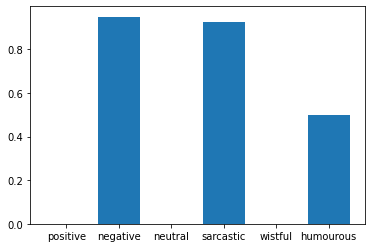

In [70]:
plt.bar(
    json.loads(reply)['sentiment_scores'].keys(), 
    json.loads(reply)['sentiment_scores'].values()
)
